In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/asus/Downloads/INT375.csv")
df.columns = df.columns.str.replace("_x0020_", "_")
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], dayfirst=True)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State         1944 non-null   object        
 1   District      1944 non-null   object        
 2   Market        1944 non-null   object        
 3   Commodity     1944 non-null   object        
 4   Variety       1944 non-null   object        
 5   Grade         1944 non-null   object        
 6   Arrival_Date  1944 non-null   datetime64[ns]
 7   Min_Price     1944 non-null   int64         
 8   Max_Price     1944 non-null   int64         
 9   Modal_Price   1944 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 152.0+ KB
None
              Arrival_Date      Min_Price      Max_Price    Modal_Price
count                 1944    1944.000000    1944.000000    1944.000000
mean   2025-04-02 00:00:00    3856.166667    4497.363169    4199.249486
m

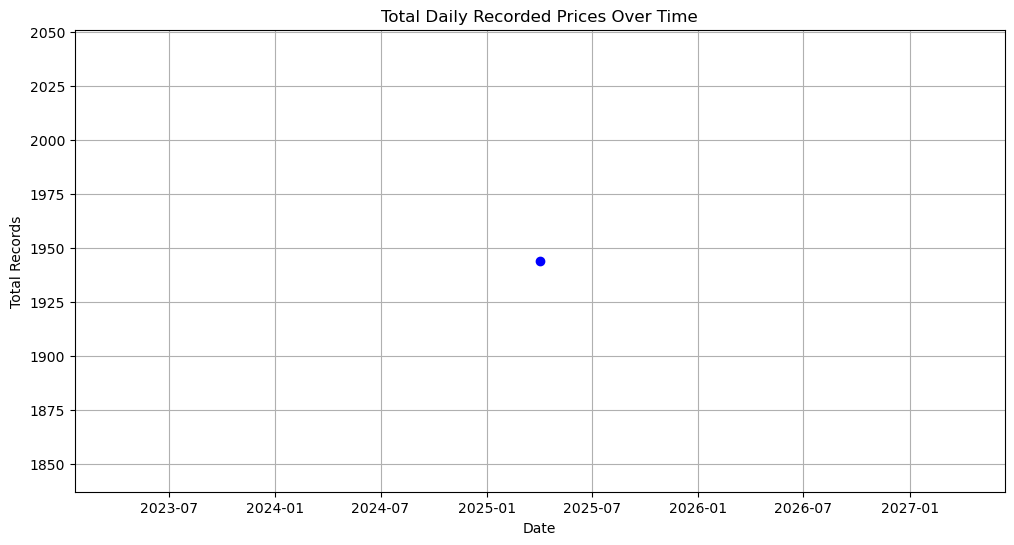

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Objective 1
daily_counts = df.groupby('Arrival_Date').size()
plt.figure(figsize=(12, 6))
plt.plot(daily_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Records')
plt.title('Total Daily Recorded Prices Over Time')
plt.grid()
plt.show()

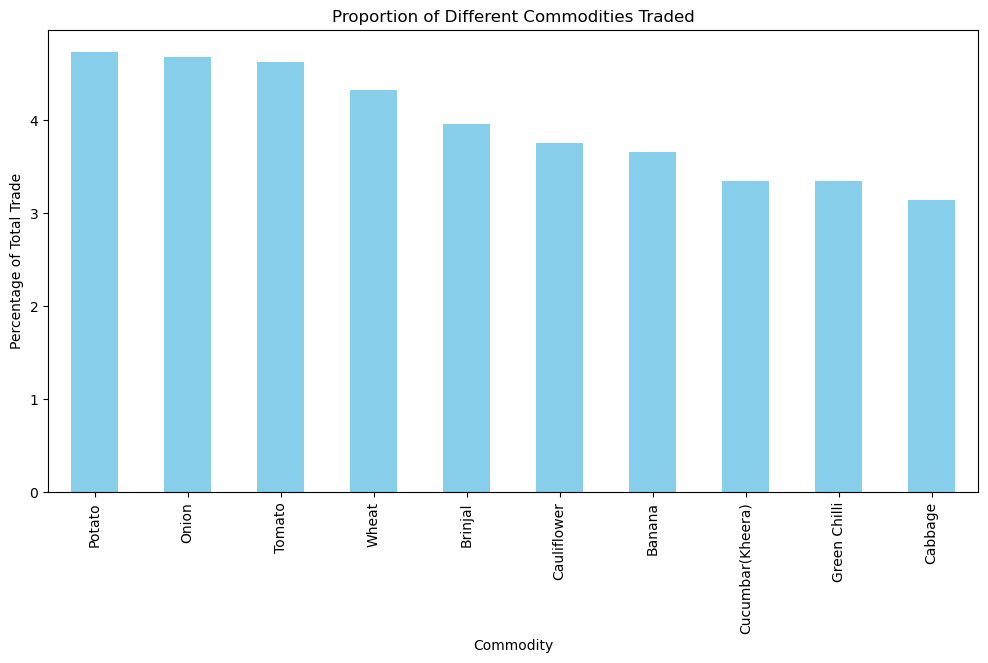

In [7]:
# Objective 2
commodity_counts = df['Commodity'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
commodity_counts[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Commodity')
plt.ylabel('Percentage of Total Trade')
plt.title('Proportion of Different Commodities Traded')
plt.xticks(rotation=90)
plt.show()

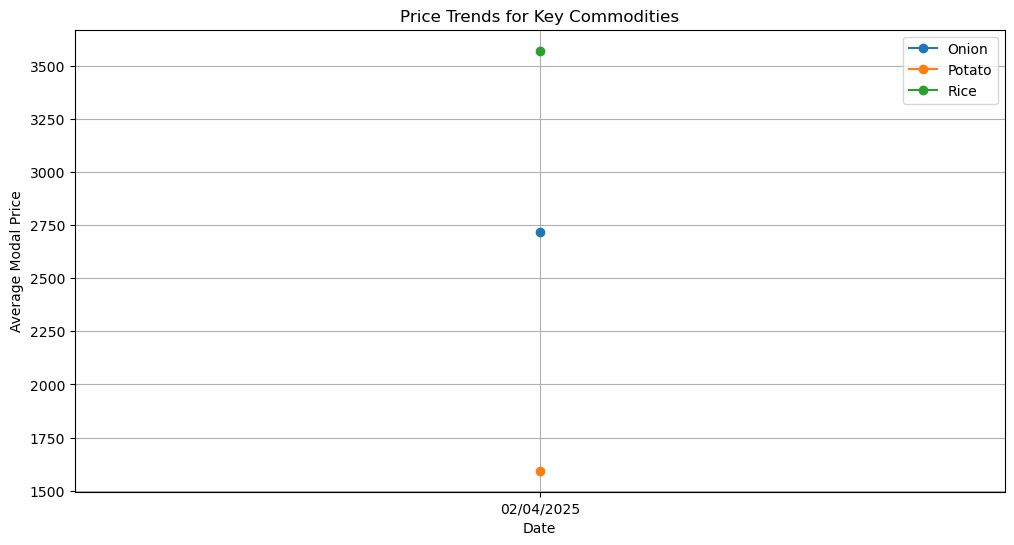

In [11]:
df = pd.read_csv("C:/Users/asus/Downloads/INT375.csv")
# Objective 3
key_commodities = ['Onion', 'Potato', 'Rice']
plt.figure(figsize=(12, 6))
for commodity in key_commodities:
    subset = df[df['Commodity'] == commodity].groupby('Arrival_Date')['Modal_x0020_Price'].mean()
    plt.plot(subset, marker='o', linestyle='-', label=commodity)
plt.xlabel('Date')
plt.ylabel('Average Modal Price')
plt.title('Price Trends for Key Commodities')
plt.legend()
plt.grid()
plt.show()

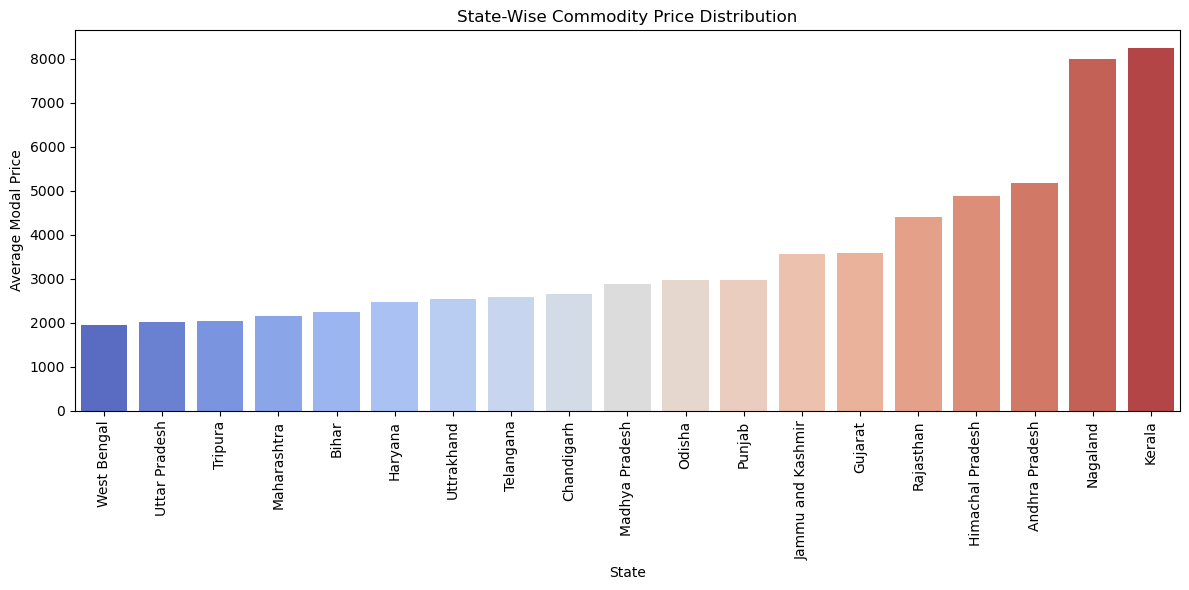

In [13]:
# Objective 4
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

state_prices = df.groupby('State')['Modal_x0020_Price'].mean().reset_index().sort_values(by='Modal_x0020_Price')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=state_prices, x='State', y='Modal_x0020_Price', hue='State', palette='coolwarm', dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Modal Price')
plt.title('State-Wise Commodity Price Distribution')
plt.tight_layout()
plt.show()

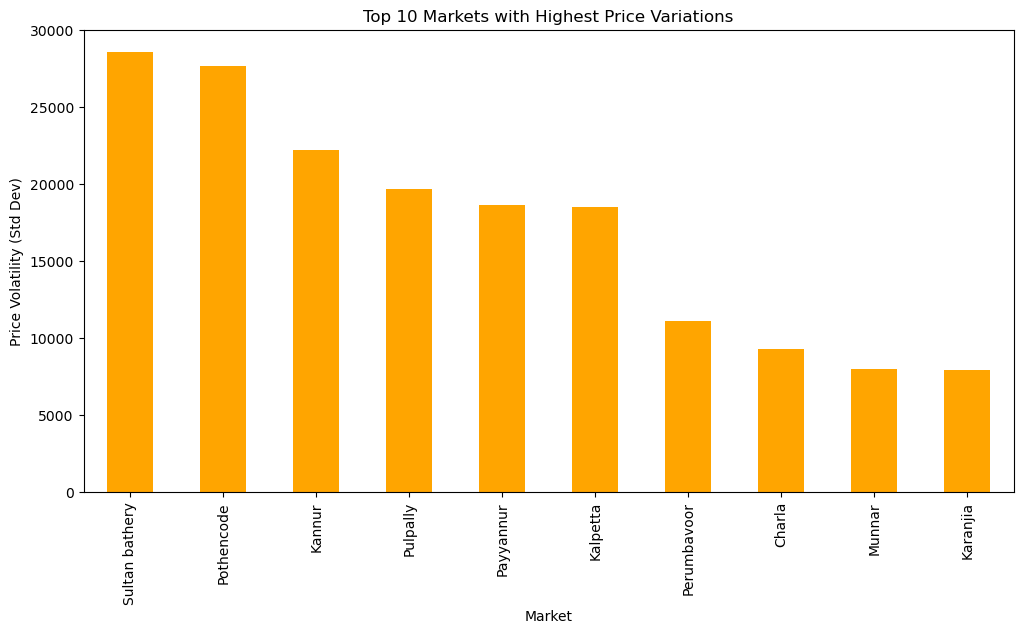

In [15]:
# Objective 5
market_volatility = df.groupby('Market')['Modal_x0020_Price'].std().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
market_volatility[:10].plot(kind='bar', color='orange')
plt.xlabel('Market')
plt.ylabel('Price Volatility (Std Dev)')
plt.title('Top 10 Markets with Highest Price Variations')
plt.xticks(rotation=90)
plt.show()